---
layout: post
title:  "영상입력 수치예측 모델 레시피"
author: 김태영
date:   2017-08-20 01:00:00
categories: Lecture
comments: true
image: http://tykimos.github.com/Keras/warehouse/2017-8-20-Image_Input_Numerical_Prediction_Model_Recipe_4m.png
---

영상을 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 영상 데이터셋 생성을 해보고, 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성 및 학습 시켜보겠습니다.

---
### 데이터셋 준비

아래 코드는 임의의 픽셀 수를 가지는 영상을 생성하고, 데이터(x)를 생성한 영상으로 지정하고, 라벨(y)를 임의의 픽셀 수로 지정하는 함수입니다.

In [ ]:
import numpy as np

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

데이터셋으로 훈련셋을 1000개, 시험셋을 100개 생성합니다.

In [ ]:
x_train, y_train = generate_dataset(1000)
x_test, y_test = generate_dataset(100)

만든 데이터셋 일부를 가시화 해보겠습니다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    sub_plt.set_title('R ' + str(y_train[i][0]))

plt.show()

R (Real) 값으로 표시된 것이 표시한 픽셀 수를 의미합니다. 한 번 표시한 픽셀에 다시 표시가 될 수 있기 때문에 실제 픽셀 수와 조금 차이는 날 수 있습니다.

---
### 레이어 준비

영상입력 수치예측 모델에서 사용할 레이어는 

수치예측 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`를 준비했습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|

---
### 모델 준비

수치예측을 하기 위해 `다층퍼셉트론 신경망 모델`, `컨볼루션 신경망 모델`을 준비했습니다.

#### 다층퍼셉트론 신경망 모델

    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim = width*height))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))

#### 컨볼루션 신경망 모델

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))

---
### 전체 소스

앞서 살펴본 `다층퍼셉트론 신경망 모델`, `컨볼루션 신경망 모델`의 전체 소스는 다음과 같습니다. 

#### 다층퍼셉트론 신경망 모델

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s - loss: 3437.5190 - val_loss: 725.2100
Epoch 2/1000
700/700 [==============================] - 0s - loss: 504.8809 - val_loss: 388.0676
Epoch 3/1000
700/700 [==============================] - 0s - loss: 423.4943 - val_loss: 978.5010
Epoch 4/1000
700/700 [==============================] - 0s - loss: 418.8270 - val_loss: 398.9486
Epoch 5/1000
700/700 [==============================] - 0s - loss: 375.4778 - val_loss: 178.0073
Epoch 6/1000
700/700 [==============================] - 0s - loss: 416.9347 - val_loss: 201.3531
Epoch 7/1000
700/700 [==============================] - 0s - loss: 294.8422 - val_loss: 229.1521
Epoch 8/1000
700/700 [==============================] - 0s - loss: 279.9129 - val_loss: 483.6633
Epoch 9/1000
700/700 [==============================] - 0s - loss: 397.2641 - val_loss: 897.9713
Epoch 10/1000
700/700 [==============================] - 0s - loss: 290.2747 - v

Using Theano backend.


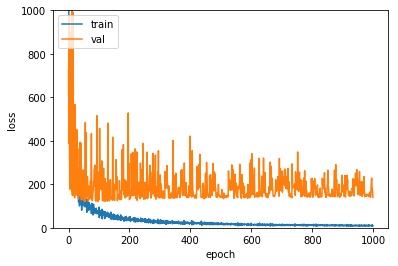

 32/100 [========>.....................] - ETA: 0s160.230983276


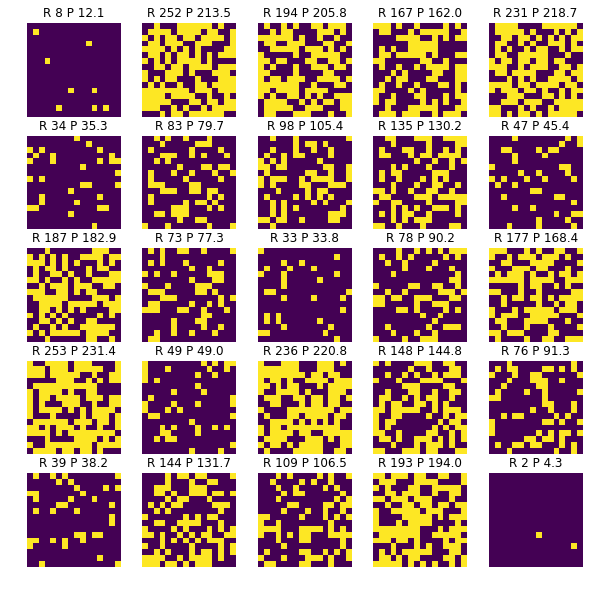

In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

# 1. 데이터셋 생성하기
x_train, y_train = generate_dataset(700)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_val_1d = x_val.reshape(x_val.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='rmsprop')

# 5. 모델 학습시키기
hist = model.fit(x_train_1d, y_train, batch_size=32, epochs=1000, validation_data=(x_val_1d, y_val))

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 1000)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 7. 모델 평가하기
score = model.evaluate(x_test_1d, y_test, batch_size=32)

print(score)

# 8. 모델 사용하기
yhat_test = model.predict(x_test_1d, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

#### 컨볼루션 신경망 모델

In [ ]:
import numpy as np

width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

x_train, y_train = generate_dataset(1000)
x_test, y_test = generate_dataset(100)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop')
model.fit(x_train, y_train, batch_size=32, epochs=1000)

score = model.evaluate(x_test, y_test, batch_size=32)

print(score)

yhat_test = model.predict(x_test_1d, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))

plt.show()

---

### 요약

N/A

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)